In [1]:
import os
import sys  
import rasterio

import pandas as pd

from rasterio.plot import show

import numpy as np

#from PIL import Image

import matplotlib.pyplot as plt

from geneticalgorithm import geneticalgorithm as ga

root = os.getcwd() + "/.."

sys.path.insert(0, root)
import src.camera_allocation_functions as aptitude

from sys import getsizeof
from IPython.display import clear_output

In [2]:

fp1 = '../data/processed/aguascalientes/00_clossenes_to_streets_normalized_ags'
walls = rasterio.open(fp1)

fp2 = '../data/processed/aguascalientes/01_densidad_delitos_sobre_calle_1998'
crime_density = rasterio.open(fp2)

fp3 = '../data/processed/aguascalientes/02_manzanas_raster_binary'
blocks = rasterio.open(fp3)

fp4 = '../data/processed/aguascalientes/delitos_ags_2018_raster_bin'
crime = rasterio.open(fp4)
C = crime.read(1)
#crime = crime_density.read(1)

#correction
S = blocks.read(1)
S[S==255] = 0

CD = crime_density.read(1)

W = walls.read(1)

Text(0.5, 0.98, 'Required Maps')

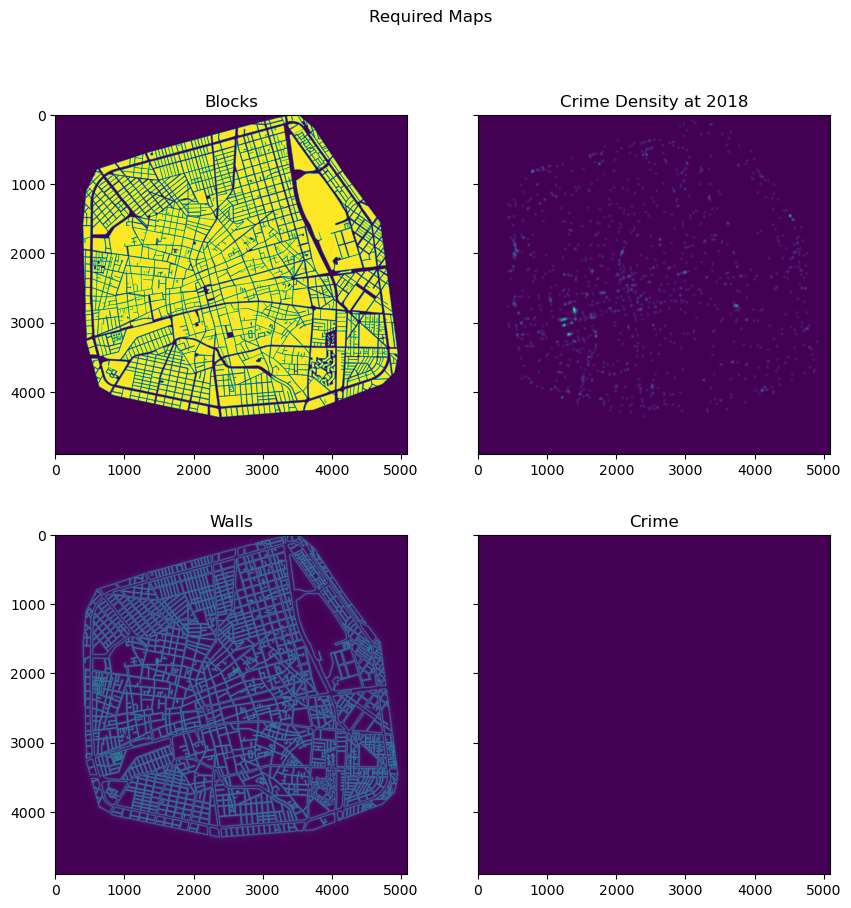

In [3]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10), sharey=True)

axs[0][0].set_title("Blocks")
axs[0][0].imshow(S)

axs[1][0].set_title("Walls")
axs[1][0].imshow(W)

axs[0][1].set_title("Crime Density at 2018")
axs[0][1].imshow(CD)

axs[1][1].set_title("Crime")
axs[1][1].imshow(C)

fig.suptitle('Required Maps')

## Union de Todas las Isovistas posibles que cubren la densidad de delitos

Text(0.5, 1.0, '1777374')

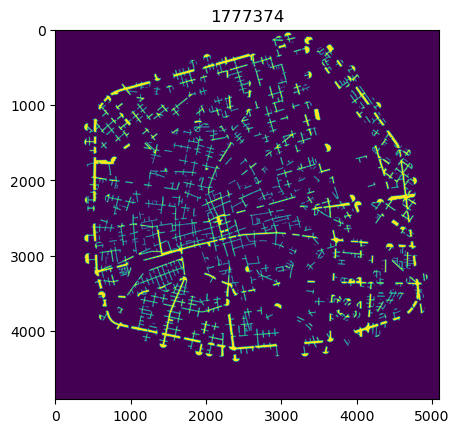

In [35]:
K = aptitude.gkern(50*2 + 1, 4)
ndens = CD*(S==0)*np.max(K)
plt.imshow(ndens > 0)
plt.title(np.sum(ndens > 0))

**Leyendo las posiciones con su fitness**

Text(0.5, 1.0, 'Indices de criminalidad ordenados de mayor a menor')

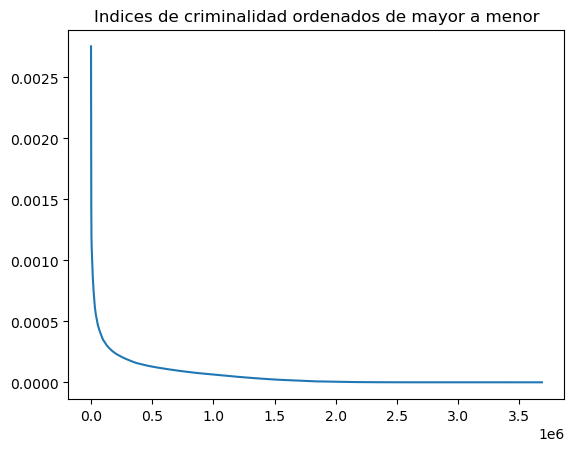

In [40]:
DF = pd.read_csv("../data/processed/aguascalientes/fitness_positions_vc_area.csv")

#ordenando por coeficiente de visibilidad
rank = "visibility coefficient"
DF_sort = DF[1:].sort_values(by = [rank], ascending = False)
plt.plot(np.array(DF_sort[:][rank]))
plt.title("Indices de criminalidad ordenados de mayor a menor")


#descartando las posiciones cercanas a la mejor
## Algoritmo Greedy
**El resultado se guarda en DF_init.**
Este proceso es rápido. Se hace en unos 3 minutos approx. 
Este resultado se puede guardar en un .csv



In [41]:
# se debería llamar R de Radio
radius = 50

#Ordenar las posiciones de acuerdo a su indice de visibilidad (DF_init)

#seleccionar la mejor posición 
DF_init = DF_sort.iloc[[0]]


#detectar que posiciones están dentro del radio 
selected_rows = ((DF_sort.iloc[0]["i"] - DF_sort["i"])**2 + (DF_sort.iloc[0]["j"] - DF_sort["j"])**2)**(0.5) >= radius

#hacer una lista con las posiciones que estan fuera del radio
DF_sort = DF_sort[selected_rows]

TOTAL = len(DF_sort)

c = 0
while len(DF_sort)>0 and np.sum(selected_rows) > 0:
    
    selected_rows = ((DF_sort.iloc[0]["i"] - DF_sort["i"])**2 + (DF_sort.iloc[0]["j"] - DF_sort["j"])**2)**(0.5)>=radius
   
    if np.sum(selected_rows)>0:
    
        DF_sort = DF_sort[selected_rows]
        DF_init = pd.concat([DF_init, DF_sort.iloc[[0]]])
    
    if c%1000==0:  
        print(100*(len(DF_sort)/TOTAL),'%')
    
    c += 1
        

99.87356175134354 %
48.89404550799336 %
21.212161534638813 %
3.9307196606588586 %


In [43]:
# tenemos 3661 posiciones de camaras
len(DF_init)

3661

In [44]:
# DF_init contiene todas las camaras. 

#n_sensors = len(DF_init)
#X_resh tiene las posiciones asociadas a los indices de criminalidad
Xresh = np.array(DF_init.iloc[:][["i","j"]]).astype(int)


In [45]:
#COVERS = np.zeros((n_sensors+1, S.shape[0], S.shape[1]))

#ncameras = len(Xresh)

#print("Partir en", 1/(ncameras/len(Xresh)))

#mapas es igual al numero de camaras + 1
#COVERS = np.zeros((ncameras+1, S.shape[0], S.shape[1]))

#memory = getsizeof(COVERS)/1024/1024/1024 
#print("GB: {x}".format(x=memory)) 


In [46]:
#COVERS = np.where(COVERS==0, np.nan, COVERS)


In [47]:
radius

50

In [ ]:
## 

In [49]:

#COVERS = np.zeros((ncameras+1, S.shape[0], S.shape[1]))
#for i, x in enumerate(Xresh[:ncameras]):
    

#    si = tuple(x)
    
    #Z = np.zeros((radius*2+1, radius*2+1))
    #Z[(radius*2, radius*2)] = 1
    
#    S_sub = np.copy(S[si[0] - radius:si[0] + radius + 1, si[1] - radius:si[1] + radius + 1])
#    CD_sub = np.copy(CD[si[0] - radius:si[0] + radius + 1, si[1] - radius:si[1] + radius + 1])
#    C_sub = np.copy(C[si[0] - radius:si[0] + radius + 1, si[1] - radius:si[1] + radius + 1])
#    isovist = aptitude.isovista(S_sub)
#    K = aptitude.gkern(radius*2 + 1, 4)
#    Kth = 0.000001
    
    # esta es la línea que calcula el número de delitos (C_sub) dentro del radio de visión  de la camara (K>th) y su isovista (isovist)
    #COVERS[i+1, si[0]-radius : si[0] + radius + 1, si[1]-radius:si[1]+radius+1] = C_sub*(K>Kth)*isovist

    #indice de observabilidad de densidad de delitos: isovist*K*CD_sub
#    COVERS[i+1, si[0]-radius : si[0] + radius + 1, si[1]-radius:si[1]+radius+1] = isovist*K*CD_sub
    


In [19]:
len(Xresh)

3661

In [51]:
## En este bloque es donde ha estado el cuello de botella. 
# la evaluación de las camaras es muy costosa en memoria como estaba antes.
# En esta versión, tenemos solo una matriz ONE_COVER, que va guardando el mejor indice de criminalidad observado y una sola matriz SENSORS, que guarda el sensor asociado a ese indice de criminalidad

99.00%
Fitness: 0.1621222003630082


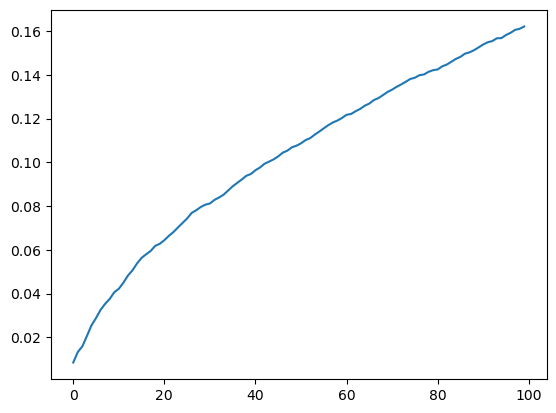

In [55]:


K = aptitude.gkern(radius*2 + 1, 4)
Kth = 0.000001
radius = 50

#el mapa 0 siempre apunta a la mejor camara
SENSORS = np.zeros((2, S.shape[0], S.shape[1]))
VALUES = np.zeros((2, S.shape[0], S.shape[1]))

ONE_COVER = np.zeros((S.shape[0], S.shape[1]))


#Justo aquí estaba el cuello de botella, si ns: numero de sensores 
# era muy alto se saturaba la memoria. Aqui se resuelte el problema usando Buble sort para guardar el mejor indice, sensor, en dos matrices bidimensionales
ns = len(Xresh)
ns = 100
F = list([])
for i, x in enumerate(Xresh[0:ns]):
    
    clear_output(wait=True)
    print("{:.2f}%".format(100*i/ns))

  ####

    si = tuple(Xresh[i])
    
    #Z = np.zeros((radius*2+1, radius*2+1))
    #Z[(radius*2, radius*2)] = 1
    
    #street
    S_sub = np.copy(S[si[0] - radius:si[0] + radius + 1, si[1] - radius:si[1] + radius + 1])
    
    #Crime density
    CD_sub = np.copy(CD[si[0] - radius:si[0] + radius + 1, si[1] - radius:si[1] + radius + 1])
    
    
    C_sub = np.copy(C[si[0] - radius:si[0] + radius + 1, si[1] - radius:si[1] + radius + 1])
    isovist = aptitude.isovista(S_sub)
    K = aptitude.gkern(radius*2 + 1, 4)

    ONE_COVER[si[0]-radius : si[0] + radius + 1, si[1]-radius:si[1]+radius+1] = isovist*K*CD_sub
   
  ##
    
    VALUES[1] = ONE_COVER

    
    SENSOR_AUX = np.argmax(VALUES, axis=0)*(i+1)
    VALUES_AUX = np.max(VALUES, axis=0)

    #best camera is stored in sensors
    SENSORS[0] = ((SENSOR_AUX==0)*SENSORS[0]+(SENSOR_AUX!=0)*SENSOR_AUX).astype(int)

    #best criminality indexes values are stored in VALUES[0]
    VALUES[0] =  VALUES_AUX

    B = np.sum(np.max(K)*(S==0)*CD)
    A = np.sum(VALUES[0])
    F.append(A/B)
    print("Fitness:", A/B)
    #plt.plot(F)
    #plt.show()


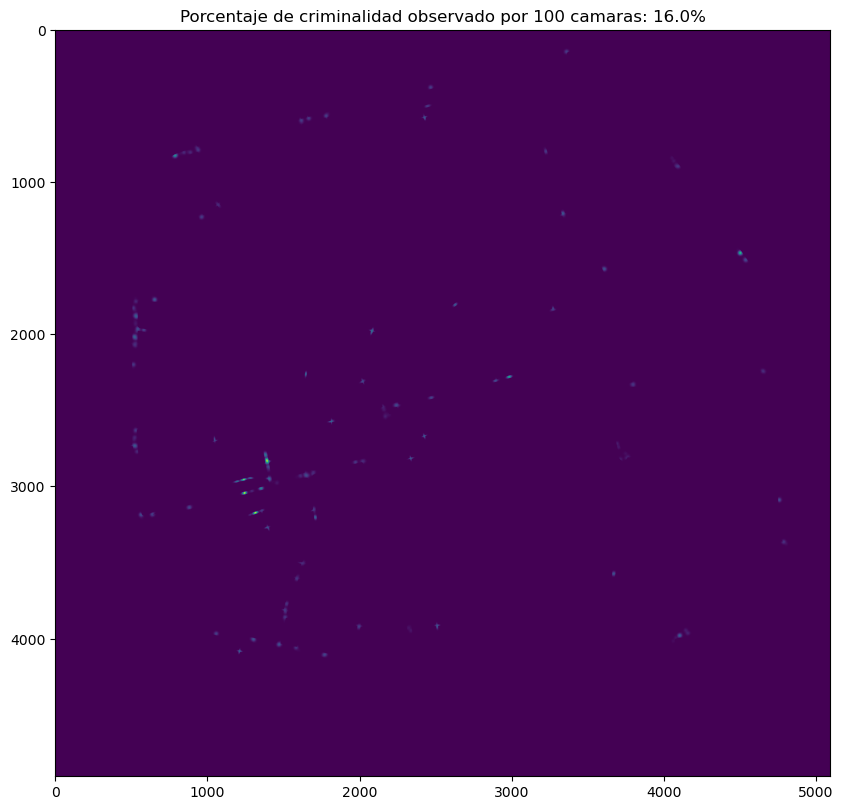

In [63]:
plt.figure(figsize=(10, 10))

B = np.sum(np.max(K)*(S==0)*CD)
A = np.sum(VALUES[0])

plt.imshow(VALUES[0])
plt.title("Porcentaje de criminalidad observado por {ns} camaras: {p}%".format(ns=ns, p=100*round(A/B,2)))
plt.show()




Text(0, 0.5, 'Fitness en Indice de criminalidad')

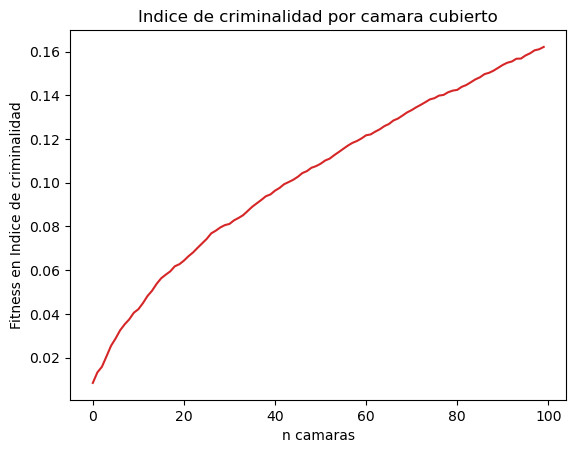

In [65]:
plt.plot(F, color = "tab:red")
plt.title("Indice de criminalidad por camara cubierto")
plt.xlabel("n camaras")
plt.ylabel("Fitness en Indice de criminalidad")

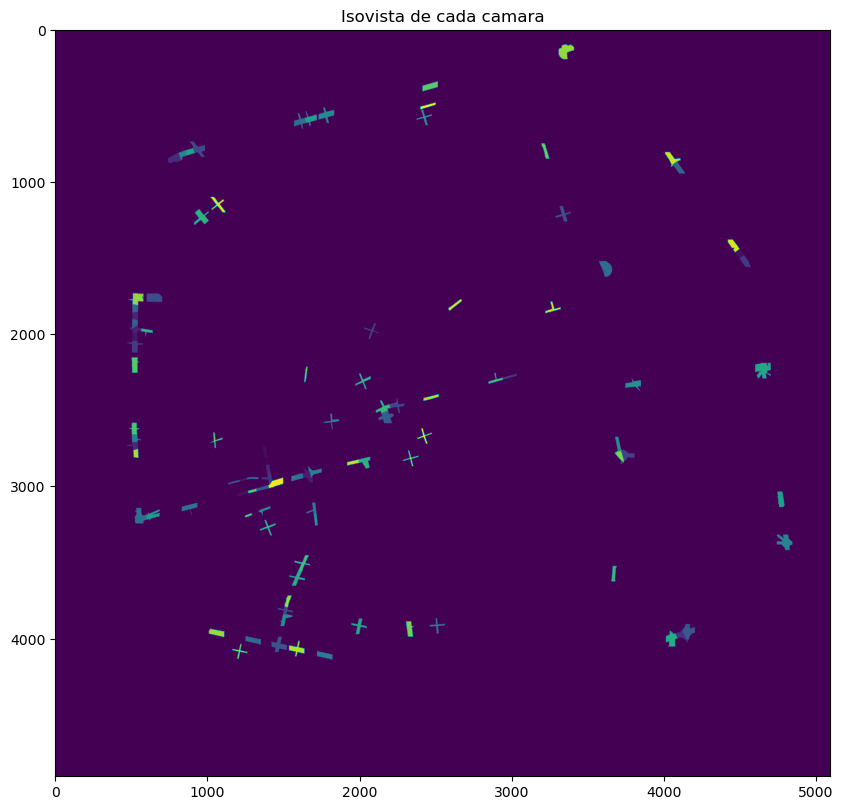

In [66]:
plt.figure(figsize=(10, 10))

B = np.sum(np.max(K)*(S==0)*CD)
A = np.sum(VALUES[0])

plt.imshow(SENSORS[0])
plt.title("Isovista de cada camara")
plt.show()


In [23]:
SOL_COVERS = np.zeros((2, S.shape[0], S.shape[1]))
SOL_ARGCOVERS = np.zeros((2, S.shape[0], S.shape[1]))


i = 0

si = tuple(Xresh[i])
S_sub = np.copy(S[si[0] - radius:si[0] + radius + 1, si[1] - radius:si[1] + radius + 1])
CD_sub = np.copy(CD[si[0] - radius:si[0] + radius + 1, si[1] - radius:si[1] + radius + 1])
C_sub = np.copy(C[si[0] - radius:si[0] + radius + 1, si[1] - radius:si[1] + radius + 1])
isovist = aptitude.isovista(S_sub)
SOL_COVERS[1, si[0]-radius : si[0] + radius + 1, si[1]-radius:si[1]+radius+1] = isovist*K*CD_sub


si = tuple(Xresh[i+1])
S_sub = np.copy(S[si[0] - radius:si[0] + radius + 1, si[1] - radius:si[1] + radius + 1])
CD_sub = np.copy(CD[si[0] - radius:si[0] + radius + 1, si[1] - radius:si[1] + radius + 1])
C_sub = np.copy(C[si[0] - radius:si[0] + radius + 1, si[1] - radius:si[1] + radius + 1])
isovist = aptitude.isovista(S_sub)
SOL_COVERS[2, si[0]-radius : si[0] + radius + 1, si[1]-radius:si[1]+radius+1] = isovist*K*CD_sub


M = np.max(SOL_COVERS,axis=0)
G = np.argmax(SOL_COVERS,axis=0)

SOL_COVERS[1,:,:] = M
SOL_ARGCOVERS[1,:,:] = G
plt.imshow(G)
# finish init


i = 2

si = tuple(Xresh[i])
S_sub = np.copy(S[si[0] - radius:si[0] + radius + 1, si[1] - radius:si[1] + radius + 1])
CD_sub = np.copy(CD[si[0] - radius:si[0] + radius + 1, si[1] - radius:si[1] + radius + 1])
C_sub = np.copy(C[si[0] - radius:si[0] + radius + 1, si[1] - radius:si[1] + radius + 1])
isovist = aptitude.isovista(S_sub)
SOL_COVERS[2, si[0]-radius : si[0] + radius + 1, si[1]-radius:si[1]+radius+1] = isovist*K*CD_sub


M = np.max(SOL_COVERS,axis = 0)
G = np.argmax(SOL_COVERS,axis = 0)



    








IndexError: index 2 is out of bounds for axis 0 with size 2

In [79]:
C = np.max(SOL_COVERS,axis=0)
AC = np.argmax(SOL_COVERS,axis=0)




#plt.imshow(np.argmax(SOL_COVERS,axis=0))




In [ ]:

COVERS = np.zeros((ncameras+1, S.shape[0], S.shape[1]))
ARGCOVERS = np.zeros((ncameras+1, S.shape[0], S.shape[1]))

for i, x in enumerate(Xresh[:ncameras]):
    

    si = tuple(x)
    
    S_sub = np.copy(S[si[0] - radius:si[0] + radius + 1, si[1] - radius:si[1] + radius + 1])
    CD_sub = np.copy(CD[si[0] - radius:si[0] + radius + 1, si[1] - radius:si[1] + radius + 1])
    C_sub = np.copy(C[si[0] - radius:si[0] + radius + 1, si[1] - radius:si[1] + radius + 1])
    isovist = aptitude.isovista(S_sub)
    K = aptitude.gkern(radius*2 + 1, 4)
  
    
    # esta es la línea que calcula el número de delitos (C_sub) dentro del radio de visión  de la camara (K>th) y su isovista (isovist)
    COVERS[i+1, si[0]-radius : si[0] + radius + 1, si[1]-radius:si[1]+radius+1] = isovist*K*CD_sub








In [54]:
for r in range(100):
    max_covers1 = np.max(COVERS[:3,:,:], axis=0)
    arg_max_covers1 = np.argmax(COVERS[:3,:,:], axis=0)

In [51]:
COVERS[2,:,:]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:

COVERS = np.zeros((ncameras+1, S.shape[0], S.shape[1]))
for i, x in enumerate(Xresh[ncameras:ncameras*2]):
    

    si = tuple(x)
    
    #Z = np.zeros((radius*2+1, radius*2+1))
    #Z[(radius*2, radius*2)] = 1
    
    S_sub = np.copy(S[si[0] - radius:si[0] + radius + 1, si[1] - radius:si[1] + radius + 1])
    CD_sub = np.copy(CD[si[0] - radius:si[0] + radius + 1, si[1] - radius:si[1] + radius + 1])
    C_sub = np.copy(C[si[0] - radius:si[0] + radius + 1, si[1] - radius:si[1] + radius + 1])
    isovist = aptitude.isovista(S_sub)
    K = aptitude.gkern(radius*2 + 1, 4)
    Kth = 0.000001
    
    # esta es la línea que calcula el número de delitos (C_sub) dentro del radio de visión  de la camara (K>th) y su isovista (isovist)
    #indice de observabilidad de densidad de delitos: isovist*K*CD_sub
    #COVERS[i+1, si[0]-radius : si[0] + radius + 1, si[1]-radius:si[1]+radius+1] = C_sub*(K>Kth)*isovist
    COVERS[i+1, si[0]-radius : si[0] + radius + 1, si[1]-radius:si[1]+radius+1] = isovist*K*CD_sub
    #COVERS[i+1, si[0]-radius : si[0] + radius + 1, si[1]-radius:si[1]+radius+1] = isovist*CD_sub*K

In [ ]:

max_covers2 = np.max(COVERS, axis=0)
arg_max_covers2 = np.argmax(COVERS, axis=0)

In [37]:
np.max(COVERS, axis=0)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

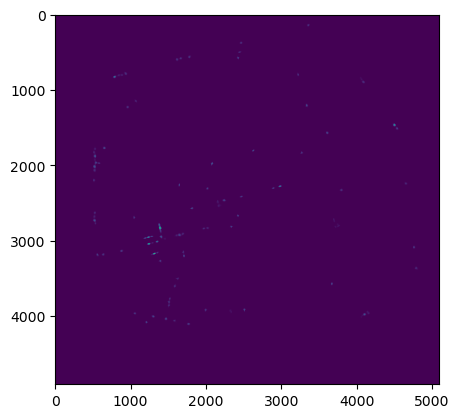

In [41]:
plt.imshow(max_covers)

In [27]:
a= 0 
for i in range(COVERS.shape[2]):
    for j in range(COVERS.shape[1]):
        for z in range(COVERS.shape[0]):
            a=a+1
            


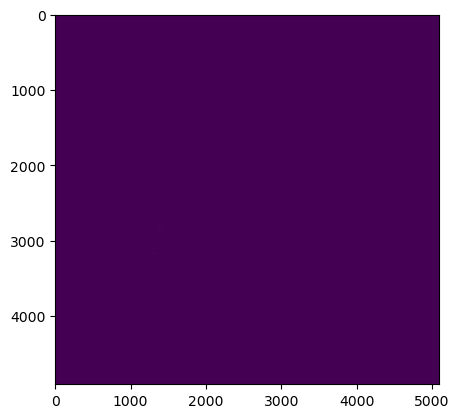

In [99]:
plt.imshow(max_covers)

In [20]:
np.sum(max_covers)

0.0454258535447075

In [21]:
import matplotlib.cm as cm

help(cm)

Help on module matplotlib.cm in matplotlib:

NAME
    matplotlib.cm - Builtin colormaps, colormap handling utilities, and the `ScalarMappable` mixin.

DESCRIPTION
    .. seealso::
    
      :doc:`/gallery/color/colormap_reference` for a list of builtin colormaps.
    
      :doc:`/tutorials/colors/colormap-manipulation` for examples of how to
      make colormaps.
    
      :doc:`/tutorials/colors/colormaps` an in-depth discussion of
      choosing colormaps.
    
      :doc:`/tutorials/colors/colormapnorms` for more details about data
      normalization.

CLASSES
    builtins.object
        ScalarMappable
    collections.abc.Mapping(collections.abc.Collection)
        ColormapRegistry
    
    class ColormapRegistry(collections.abc.Mapping)
     |  ColormapRegistry(cmaps)
     |  
     |  Container for colormaps that are known to Matplotlib by name.
     |  
     |  The universal registry instance is `matplotlib.colormaps`. There should be
     |  no need for users to instantiate `

In [23]:
np.sum(max_covers)

NameError: name 'max_covers' is not defined

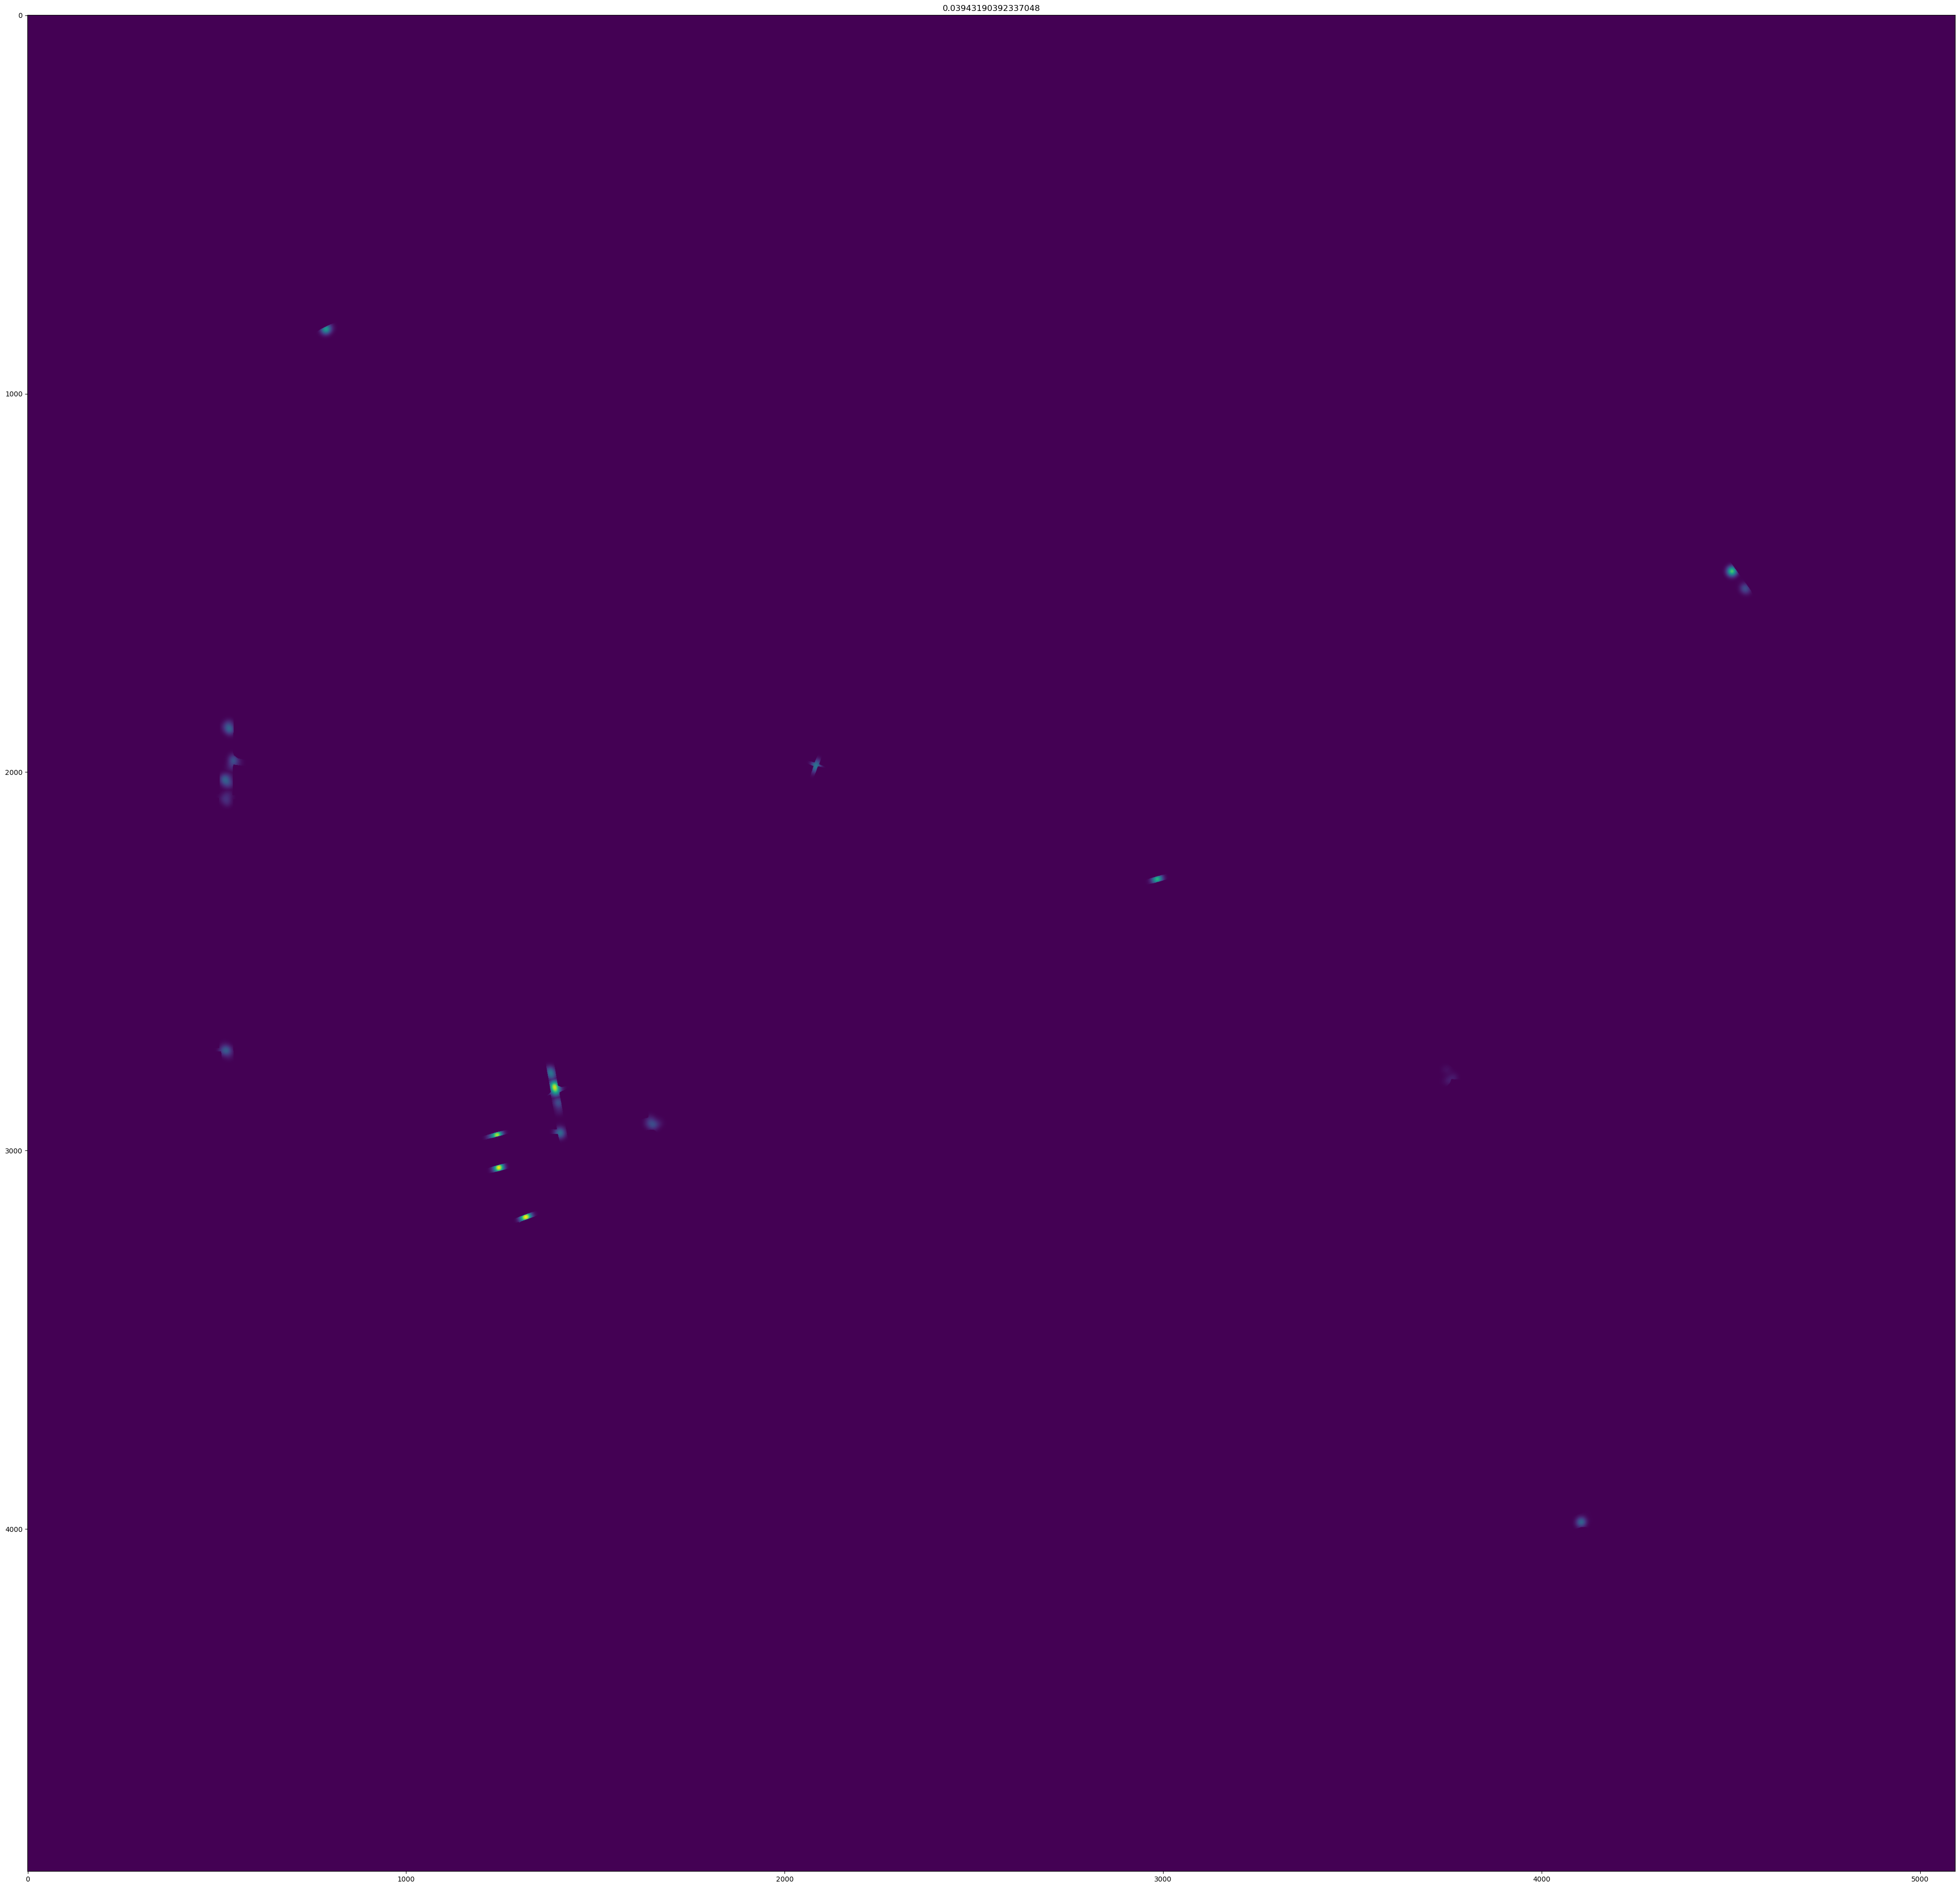

In [110]:
plt.figure(figsize=(50, 50))
plt.imshow(max_covers)
plt.title(np.sum(max_covers))
plt.savefig("solution for the 20 best cameras.png")

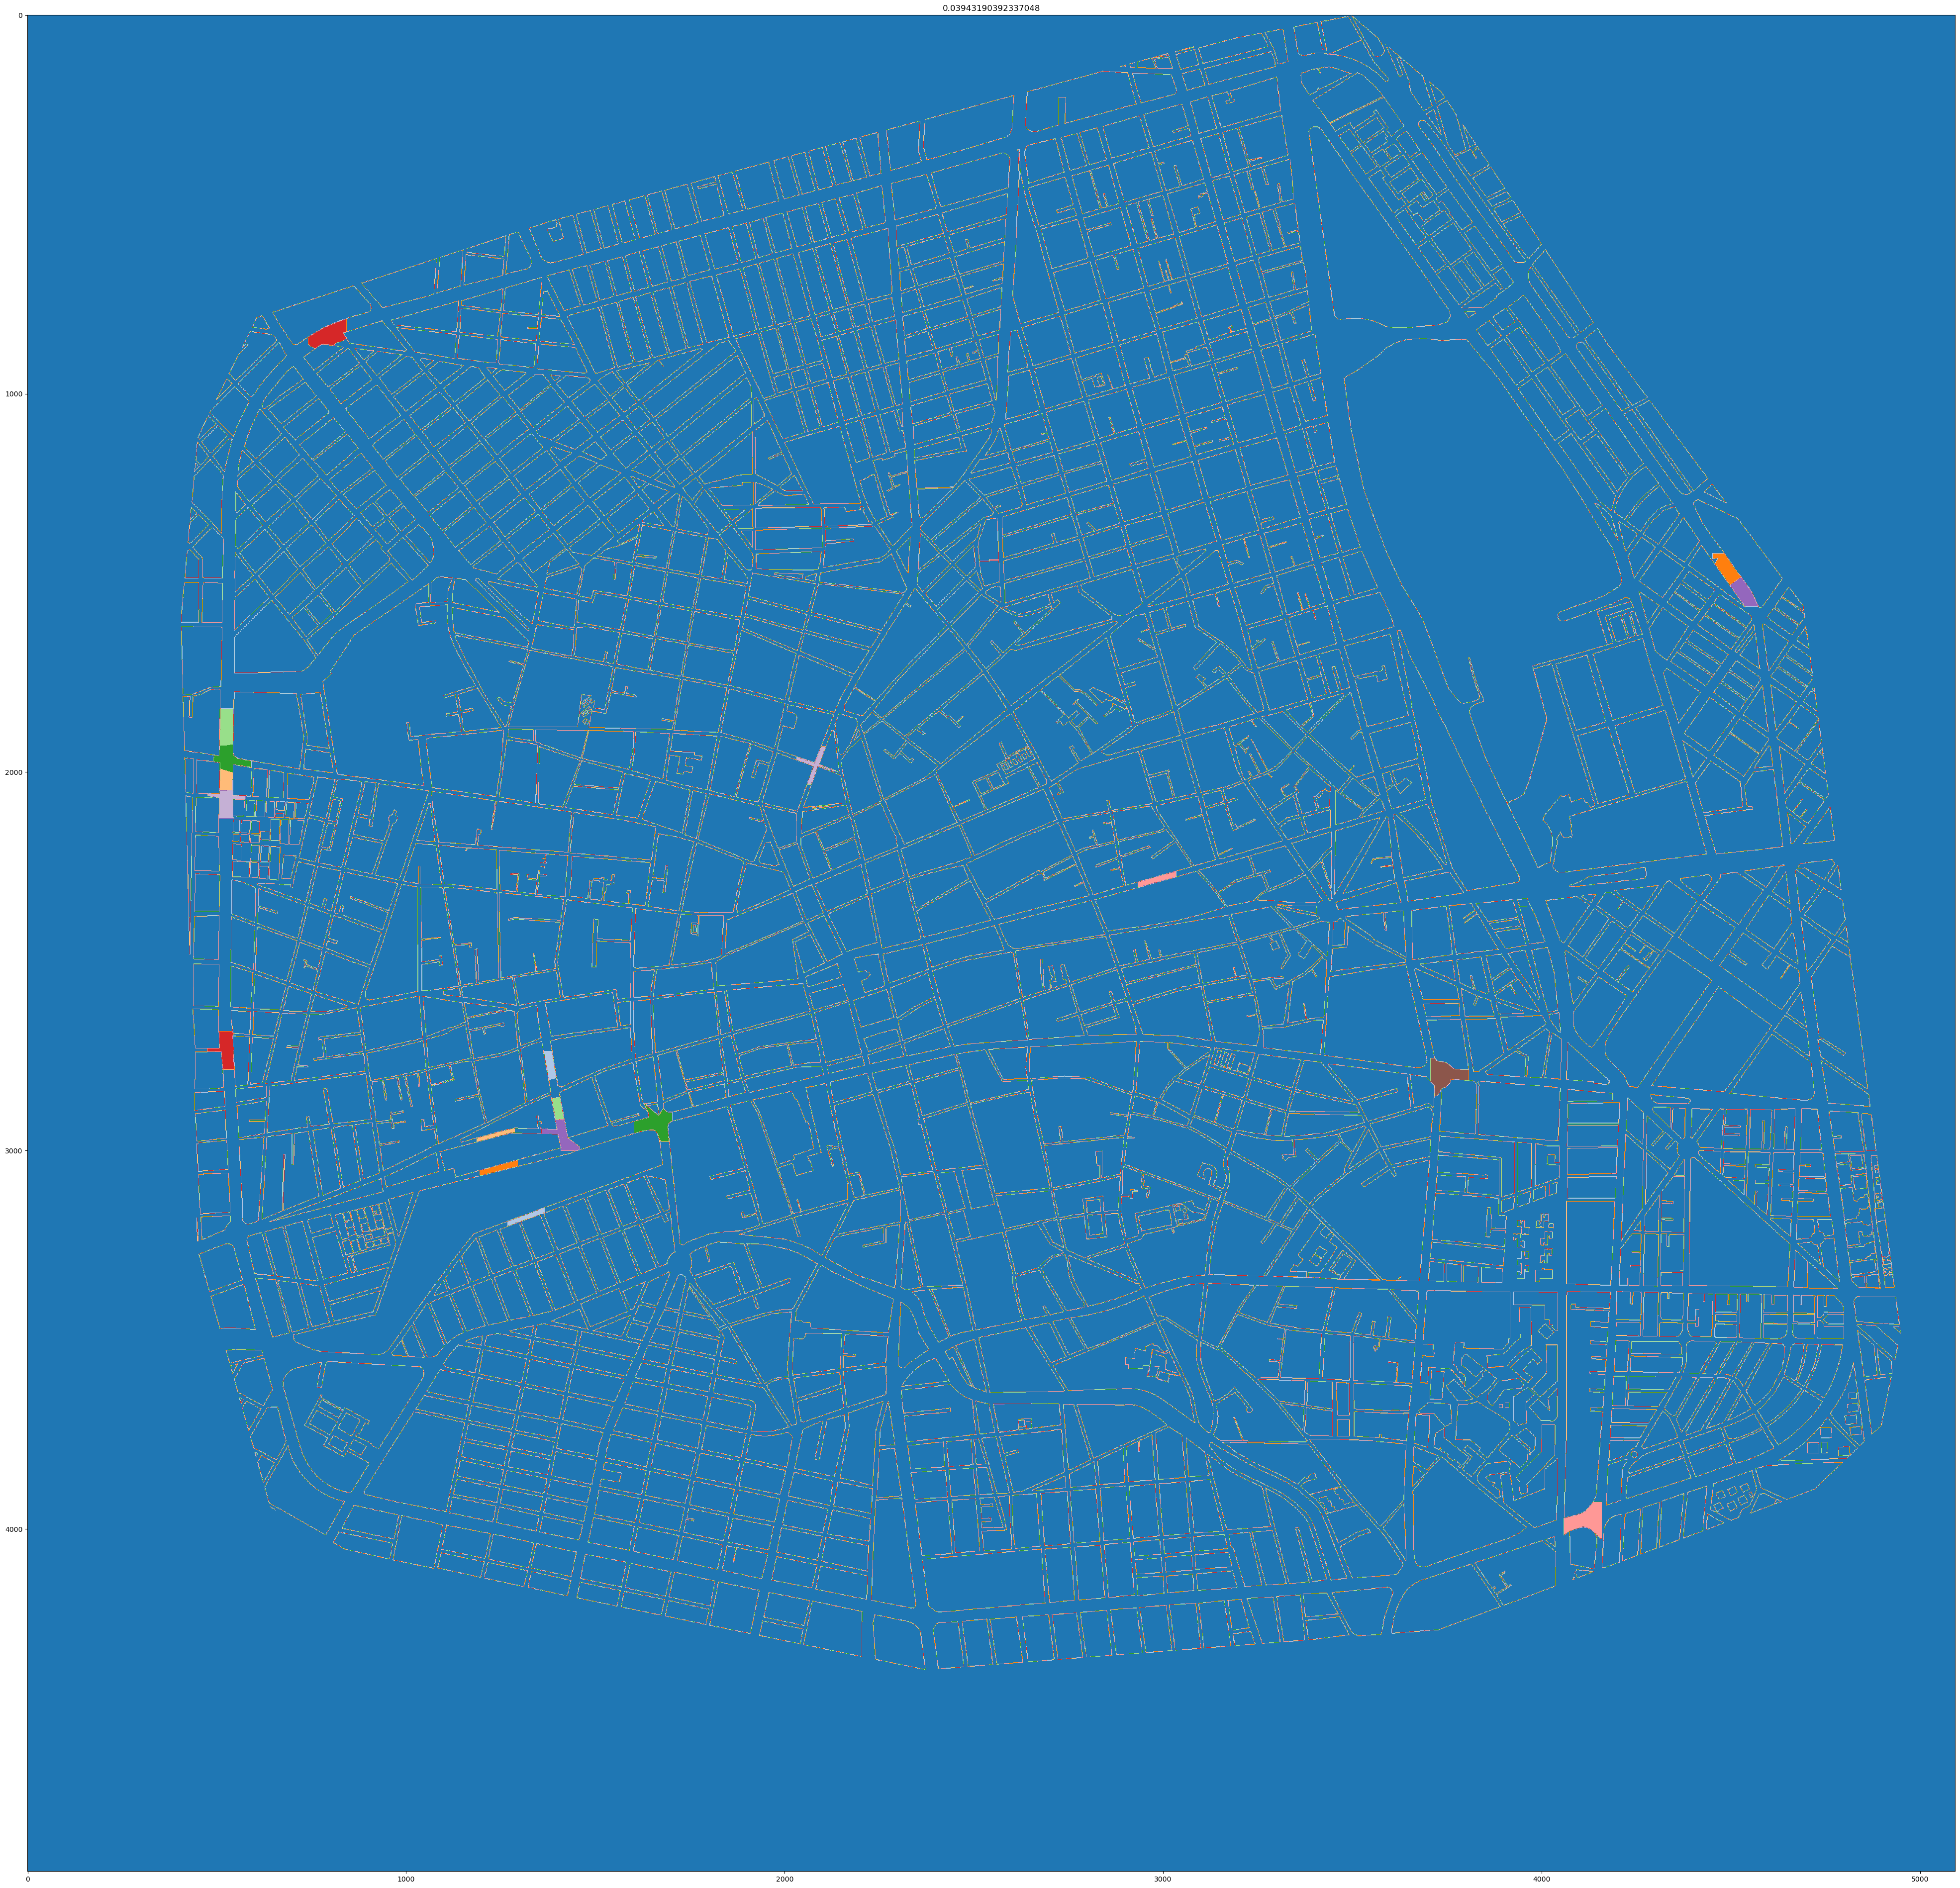

In [96]:
plt.figure(figsize=(50, 50))
plt.imshow((arg_max_covers) + (W==1)*np.max(arg_max_covers),cmap=cm.tab20)
plt.title(np.sum(max_covers))
plt.savefig("solution for the 20 best cameras.png")

In [19]:
n = 10

X = np.array([ np.random.randint(S.shape) for i in range(100)])
X = X.flatten()

In [20]:
def f(X, S = S):
    
    radius = 50
    Xresh = X.reshape(2,-1).astype(int)
    
    COVERS = np.zeros((n_sensors+1, S.shape[0], S.shape[1]))

    for i, x in enumerate(Xresh):

        si = tuple(x)

        Z = np.zeros((radius*2+1, radius*2+1))
        Z[(radius*2, radius*2)] = 1

        S_sub = np.copy(S[si[0] - radius:si[0] + radius + 1, si[1] - radius:si[1] + radius + 1])
        CD_sub = np.copy(CD[si[0] - radius:si[0] + radius + 1, si[1] - radius:si[1] + radius + 1])
        C_sub = np.copy(C[si[0] - radius:si[0] + radius + 1, si[1] - radius:si[1] + radius + 1])
        isovist = aptitude.isovista(S_sub)
        K = aptitude.gkern(radius*2 + 1, 4)
        Kth = 0.000001

        # esta es la línea que calcula el número de delitos (C_sub) dentro del radio de visión  de la camara (K>th) y su isovista (isovist)
        #indice de observabilidad de densidad de delitos: isovist*K*CD_sub
        #COVERS[i+1, si[0]-radius : si[0] + radius + 1, si[1]-radius:si[1]+radius+1] = C_sub*(K>Kth)*isovist

        COVERS[i+1, si[0]-radius : si[0] + radius + 1, si[1]-radius:si[1]+radius+1] = isovist*K*CD_sub

    s = np.sum(np.max(COVERS, axis=0))
   # print(s)
    return -s

    

In [21]:
radius = 50
n_sensors = n
varbound = np.array([[radius, S.shape[0]-radius-1], [radius, S.shape[1]-radius-1]]*n_sensors)
dim = len(varbound)

dim

20

In [127]:
algorithm_parameters = {"max_num_iteration": 100, 
                        "population_size": 1000, 
                        "mutation_probability": 0.1, 
                        "elit_ratio": 0.1, 
                        "crossover_probability": 0.5, 
                        "parents_portion": 0.3, 
                        "crossover_type": 
                        "uniform", 
                        "max_iteration_without_improv": 20}

In [128]:
model = ga(function = f,
             dimension = dim,
             algorithm_parameters = algorithm_parameters,
             variable_type = 'int',
             variable_boundaries = varbound,
             convergence_curve = True)

 The best solution found:                                                                           
 [2770. 3719. 3711. 2333. 1973. 1744.  189.  581. 1011. 3692. 2020.  525.
 3301. 3256. 2837. 3936. 2597. 3982. 4198. 3191.]

 Objective function:
 -0.005146309733504282


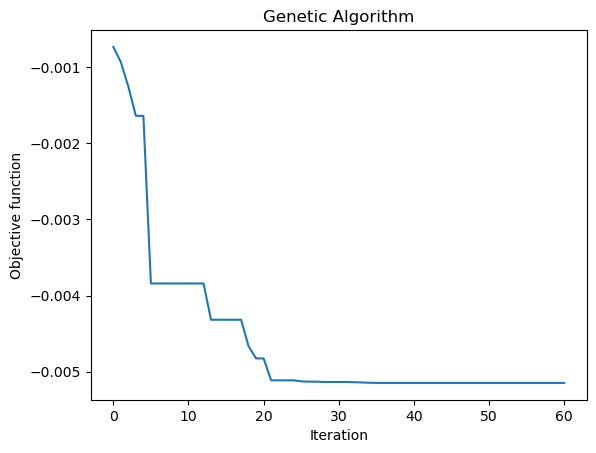

In [129]:
model.run()

In [137]:
model.output_dict["variable"].astype(int).reshape(-1,2)

array([[2770, 3719],
       [3711, 2333],
       [1973, 1744],
       [ 189,  581],
       [1011, 3692],
       [2020,  525],
       [3301, 3256],
       [2837, 3936],
       [2597, 3982],
       [4198, 3191]])

In [138]:
model.output_dict

{'variable': array([2770., 3719., 3711., 2333., 1973., 1744.,  189.,  581., 1011.,
        3692., 2020.,  525., 3301., 3256., 2837., 3936., 2597., 3982.,
        4198., 3191.]),
 'function': -0.005146309733504282}

**Notas e Hipotesis**

* No necesariamente cubrir mas área es cubrir mas delitos
* Hay un compromiso de cubrir area vs densidad de delitos



**Contando los delitos dentro del radio de la isovista de la camara**

In [19]:
np.sum(max_covers)

0.1018897613321857

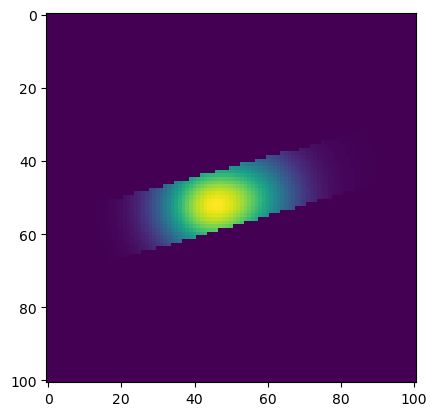

In [33]:
plt.imshow(isovist*K*CD_sub)

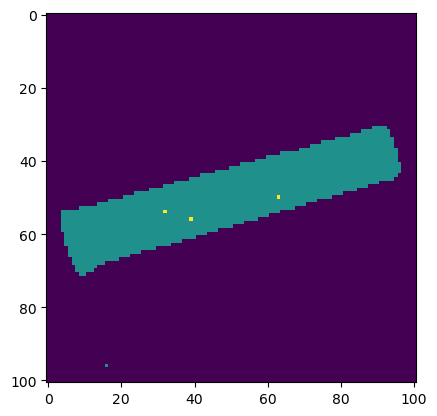

In [20]:
plt.imshow(C_sub+(isovist*(K>0.000001)))

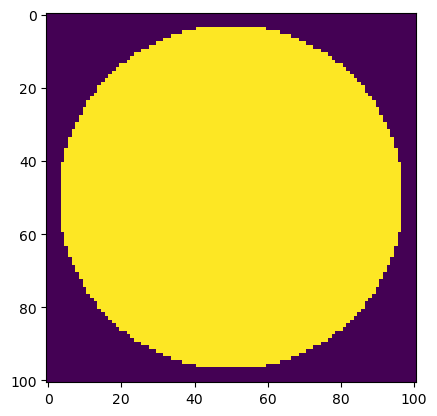

In [21]:
#radio de visión de una camara 360
plt.imshow(K>0.000001)

Text(0.5, 1.0, 'número de delitos : 3')

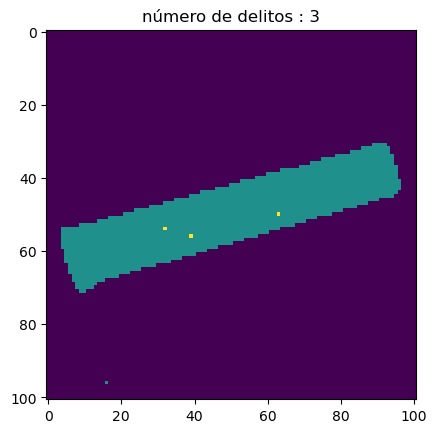

In [22]:
# delitos detectados dentro del radio de visión y la isovista
plt.imshow(C_sub+(isovist*(K>0.000001)))
plt.title("número de delitos : {n}".format( n= np.sum((C_sub*isovist*K>0.000001))))

In [ ]:
# delitos detectados dentro del radio de visión y la isovista
plt.imshow(C_sub+(isovist*(K>0.000001)))
plt.title("número de delitos : {n}".format( n= np.sum((C_sub*isovist*K>0.000001))))

In [15]:
Que es deseable en con un operador de mutacion - cruza?

Y_{G+1} = P(G,\theta)


max \theta ( evaluate(P(Y_G,\theta)) - evaluate(Y_{G}) )

maximizar la probabilidad de mejorar en general la función objetivo en la siguiente iteracion



SyntaxError: invalid syntax (2220799539.py, line 3)

In [114]:
np.max(K)

0.0009981259395846899

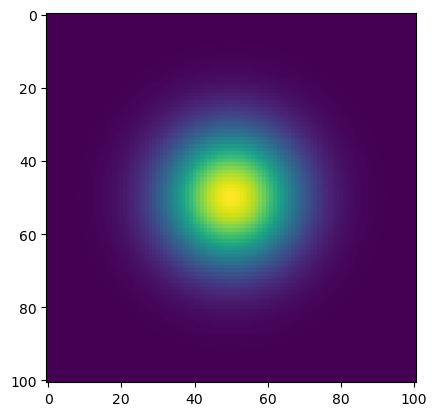